# Feature Selection Using Scikit-Learn

In this exercise, you will perform feature selection using built-in scikit-learn tools.
* You will train decision tree models on "cell2cell," a telecom company churn prediction data set.
* After performing a grid search to find the hyperparameter configuration that results in the best performing Decision Tree, you will perform feature selection to find the most important features in your training data for predicting customer churn.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

We will also import the scikit-learn `DecisionTreeClassifier`, the `train_test_split()` function for splitting the data into training and test sets, `GridSearchCV` to perform model selection to find the model with the best cross-validation score, and the metric `accuracy_score` to evaluate your model.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Step 1. Load a 'ready-to-fit' Data Set

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")
df = pd.read_csv(filename, header=0)

## Step 2: Create Training and Test Data Sets

### Create Labeled Examples

The code cell obtains columns from our data and creates features and labels.

In [4]:
y = df['Churn']
X = df.drop(columns = 'Churn', axis=1)
X.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
0,3000002,False,False,True,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3000010,True,False,False,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000014,True,False,False,False,False,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3000022,False,False,True,False,False,True,True,True,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000026,False,False,False,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Split Examples Into Training and Test Sets

The code cell below creates training and test data sets. Since we will be performing model selection, we will split our 10% of our data to serve as a test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

## Step 3: Perform Decision Tree Model Selection Using Grid Search


We will use scikit-learn's `GridSearchCV` to search over different combinations of possible hyperparameter values to find the set that results in the best cross-validation (CV) score. We will look for the best values of the following hyperparameters: the maximum depth of the tree (`max_depth`) and the minimum number of samples required to be at a leaf node (`min_samples_leaf`). 

### a. Set up the Parameter Grid

In [6]:
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
param_grid={'max_depth':md, 'min_samples_leaf':msl}

param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 100]}

### b. Perform Grid Search Cross-Validation
<b>Note</b>: The cell below may take a little while to run.


In [7]:
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model object without supplying arguments
model = DecisionTreeClassifier()

# 2. Run a Grid Search with 5-fold cross-validation using our the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model to the training data and assign the fitted model to the 
#    variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


### c. Identify the Best Hyperparameter Values

In the code cell below, access the best hyperparameter values for `max_depth` and `min_samples_leaf` from the `grid_search` object. *<b>Hint</b>*: You can access specific hyperparameter values using the `grid_search` object's `best_estimator_` attribute followed by the hyperparameter name (use dot notation to connect the object, attribute, and hyperparameter named as `object.attribute.name`).

1. Save the best value of `max_depth` to variable `best_md`.
2. Save the best value of `min_samples_leaf` to variable `best_msl`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [27]:
# YOUR CODE HERE
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf
# Print best performing hyperparameter configuration
print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))

# Print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for max depth: 4
Best value for the minimum number of samples required to be at a leaf node: 50
Accuracy score: 0.7147490424208727


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [28]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testGridSearchValues

try:
    p, err = testGridSearchValues(best_md, best_msl)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 4. Fit the Best Model

Now that you have found the values of `max_depth` and `min_samples_leaf` that produce the best model, you can fit a `DecisionTreeClassifier` with those hyperparameter values. 

In the code cell below, fit the *one* decision tree classifier using the best hyperparameters identified, test your model on the test set (`X_test`), and obtain the final accuracy score of your model's class label predictions.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [29]:
# 1. Create a DecisionTreeClassifier model object and assign it to the variable 'model'
# YOUR CODE HERE
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 50)
    
# 2. Fit the model to the training data 
# YOUR CODE HERE
model.fit(X_train, y_train)

# 3. Use the predict() method to make predictions on the test data and assign the results to the variable
# 'class_label_predictions'
# YOUR CODE HERE
class_label_predictions = model.predict(X_test) 

# 4. Compute the accuracy score and assign the result to the variable 'acc_score'
# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)

print('Accuracy score: {0}'.format(acc_score))

Accuracy score: 0.7181194906953967


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [30]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testDTModel

try:
    p, err = testDTModel(df, model,class_label_predictions, acc_score)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 5: Perform  Feature Selection Using Scikit-learn

In the code cell below, you will find the five most important features in your training data (`X_train`) for predicting churn.

Perform the following steps:

1. Through your `model` object, you can obtain scores corresponding to the importance of the predictive features on which the examples were split for classification using the `feature_importances_` attribute. You can use this attribute with the following syntax: `model.feature_importances_`. This returns a NumPy array. Use this method to obtain an array of scores and save the array to the variable `feature_imp`.

2. Create a Pandas DataFrame out of all feature names and their measures of importance by using the `pd.DataFrame()` function. Call the function with a dictionary containing the following key/value pairs:
    * `'name': X_train.columns.values`
    * `'imp': feature_imp`
    
    Assign the DataFrame to the variable `df_features`.

3. Using the Pandas method `sort_values()`, sort the importance scores in the `imp` column in the new  DataFrame `df_features` in descending order. Assign the resulting DataFrame to variable `df_sorted`.

4. Using `iloc`, extract the top 5 values in `df_sorted`. Then, extract the values in the column `name` in `df_sorted`. Save these names to a Python list called `top_five `.


### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [39]:
#1. Obtain "feature importance" scores from the model object and save the array to the variable 
# 'feature_imp'

# YOUR CODE HERE
feature_imp = model.feature_importances_

#2. Create a Pandas DataFrame with a list of all features and their scores. 
# Save the result to the variable 'df_features'

# YOUR CODE HERE
df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})
#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

# YOUR CODE HERE
df_sorted = df_features.sort_values(by=['imp'], ascending = False)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five' 

# YOUR CODE HERE
top_five = list(df_sorted.iloc [0:5]['name'])
print('Top five features: {0}'.format(top_five))


Top five features: ['CurrentEquipmentDays', 'MonthsInService', 'MonthlyMinutes', 'PercChangeMinutes', 'TotalRecurringCharge']


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [40]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testHFS

try:
    p, err = testHFS(df, model,feature_imp, df_features, df_sorted, top_five)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


The code cell below produces a bar plot for the normalized importance of the top 5 most predictive features on which the examples were split for classification.

Text(0, 0.5, 'Normalized importance')

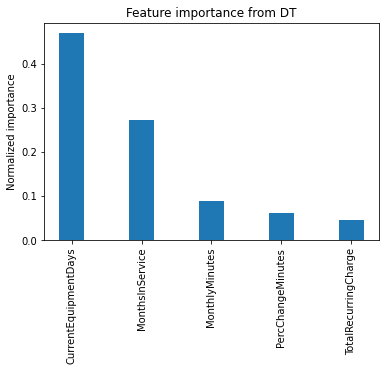

In [41]:
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse=True)[:5], width = 0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')